<a href="https://colab.research.google.com/github/Hsynyvz/Machine-Deep-learning/blob/main/Binary_classification0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
import os
import cv2
from PIL import Image
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
image_directory  = "/content/drive/MyDrive/Machine_Learning /Malaria_dataset/cell_images"

In [3]:
for directory_path in glob.glob(image_directory + "/*"):
    label = directory_path.split("/")[-1]
    print(label)

Uninfected
Parasitized


In [4]:
glob.glob("/content/drive/MyDrive/Machine_Learning /Malaria_dataset/cell_images/*")

['/content/drive/MyDrive/Machine_Learning /Malaria_dataset/cell_images/Uninfected',
 '/content/drive/MyDrive/Machine_Learning /Malaria_dataset/cell_images/Parasitized']

In [5]:
 label = directory_path.split("/")[-1]

In [6]:
SIZE = 256

train_images = []
train_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/Machine_Learning /Malaria_dataset/cell_images/*"):
    label = directory_path.split("/")[-1]
    
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

In [7]:
len(train_images), len(train_labels)

(800, 800)

In [8]:
train_images[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [9]:
train_images = np.array(train_images) /255.0

In [10]:
train_images[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [11]:
train_labels = np.array(train_labels)

In [12]:
train_labels.shape, train_images.shape

((800,), (800, 256, 256, 3))

In [13]:

from sklearn.preprocessing import LabelEncoder


In [14]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(train_labels)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(train_images, integer_encoded, test_size = 0.2, random_state = 0)

In [17]:
INPUT_SHAPE = (SIZE, SIZE, 3)  


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))  


In [18]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',            
              metrics=['accuracy'])

In [19]:
history = model.fit(X_train, 
                         y_train, 
                         
                         verbose = 1, 
                         epochs = 10 , 
                    validation_split = 0.2 , 
                    batch_size = 128)


Epoch 1/10
4/4 [==============================] - 15s 465ms/step - loss: 2.5288 - accuracy: 0.4941 - val_loss: 0.8351 - val_accuracy: 0.5469
Epoch 2/10
4/4 [==============================] - 1s 368ms/step - loss: 1.1306 - accuracy: 0.5781 - val_loss: 0.3271 - val_accuracy: 0.9766
Epoch 3/10
4/4 [==============================] - 1s 368ms/step - loss: 0.2494 - accuracy: 0.9434 - val_loss: 0.0859 - val_accuracy: 0.9844
Epoch 4/10
4/4 [==============================] - 1s 369ms/step - loss: 0.0518 - accuracy: 0.9980 - val_loss: 0.0145 - val_accuracy: 0.9922
Epoch 5/10
4/4 [==============================] - 1s 364ms/step - loss: 0.0146 - accuracy: 0.9980 - val_loss: 0.0146 - val_accuracy: 0.9922
Epoch 6/10
4/4 [==============================] - 1s 360ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 1s 362ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 0.9922
Epoch 8/10
4/4 [===

In [20]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 1s 34ms/step - loss: 0.0015 - accuracy: 1.0000


[0.0014775118324905634, 1.0]

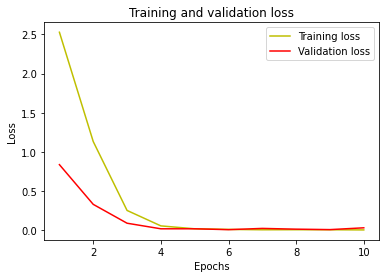

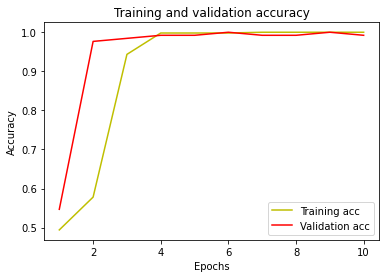

In [21]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
mythreshold=0.91
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)


[[88  0]
 [ 0 72]]


In [23]:

y_pred[:3]

array([[1],
       [0],
       [1]])